# House Prices - Advanced Regression Techniques



The goal of our project is to predict housing sales prices using the Ames Housing dataset available on Kaggle (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview) through techniques that include feature engineering, random forests, gradient boosting, and neural networks.

# Install Dependencies

Please note that the project has been developed using Google Colab Notebooks so dependencies are installed via Google Colab.

In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 33.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


# Import Statements

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import joblib
#from google.colab import files
import tensorflow as tf

# Import Train/Test Datasets and EDA

Import and read the data and then take a quick look at it using .head().

In [ ]:
train_path = "/content/drive/MyDrive/house_regression/train.csv"
housing = pd.read_csv(train_path)
housing.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_path = "/content/drive/MyDrive/house_regression/test.csv"
housing_test = pd.read_csv(test_path)

Lots of features have null values. They will have to be dealt with. There are also many categorical features, more than quantitative features.

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Tag the Label

Save a labelled dataframe to be used for visualization purposes before dropping the label.

In [ ]:
housing_labelled = housing.copy()

In [ ]:
housing_labels = housing["SalePrice"].copy()
housing.drop("SalePrice", axis=1, inplace=True)

In [ ]:
housing_labels = housing_labels.to_numpy(dtype="float")

# Feature Engineering

Separate quantitative features from categorical features.

In [ ]:
housing_copy = housing.copy()
housing_num_copy = housing_copy.select_dtypes(include=[np.number])
housing_cat_copy = housing_copy.select_dtypes(include='object')

In [ ]:
housing_test_copy = housing_test.copy()
housing_test_num_copy = housing_test_copy.select_dtypes(include=[np.number])
housing_test_cat_copy = housing_test_copy.select_dtypes(include='object')

Impute NAs of numerical features with medians except for GarageYrBlt, for which we fill in the value of 0 because according to the data description, that means the house has no garage.

Impute NAs of categorical features with "None" because that's what they are as per the data description available on Kaggle.

In [ ]:
housing_num_copy["GarageYrBlt"].fillna(0, inplace=True)

imputer_num = SimpleImputer(strategy="median")
imputer_num.fit(housing_num_copy)
housing_num = imputer_num.transform(housing_num_copy)
housing_num = pd.DataFrame(housing_num,
                          columns=housing_num_copy.columns,
                          index=housing_num_copy.Id)

imputer_cat = SimpleImputer(strategy="constant", fill_value="None")
imputer_cat.fit(housing_cat_copy)
housing_cat = imputer_cat.transform(housing_cat_copy)
housing_cat = pd.DataFrame(housing_cat,
                          columns=housing_cat_copy.columns,
                          index=housing_num_copy.Id)

housing_num.drop("Id", axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
housing_test_num_copy["GarageYrBlt"].fillna(0, inplace=True)

housing_test_num = imputer_num.transform(housing_test_num_copy)
housing_test_num = pd.DataFrame(housing_test_num,
                          columns=housing_test_num_copy.columns,
                          index=housing_test_num_copy.Id)


housing_test_cat = imputer_cat.transform(housing_test_cat_copy)
housing_test_cat = pd.DataFrame(housing_test_cat,
                          columns=housing_test_cat_copy.columns,
                          index=housing_test_num_copy.Id)

test_ids = housing_test_num["Id"].astype("int")
housing_test_num.drop("Id", axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Save the Testing dataset IDs within their own dataframe for later.

In [ ]:
test_ids = pd.DataFrame(test_ids, index=test_ids.index)
test_ids

,Id
Id,
1461,1461
1462,1462
1463,1463
1464,1464
1465,1465
...,...
2915,2915
2916,2916
2917,2917


Create new numerical features for the dataset. These features are:

1) OverallQC: Overall quality & condition.

2) YearsUntilRemod: How many years after the house was built was it remodelled.

3) YearsUntilGarageBlt: How many years after the house was built was a garage built.

4) 1stFlrPlusBsmtSF: Total area in SF of the house's basement plus its 1st floor. Later it will be explained why this feature is necessary.

In [ ]:
housing_num["OverallQC"] = housing_num["OverallQual"] + housing_num[
                           "OverallCond"]
housing_num["YearsUntilRemod"] = housing_num["YearRemodAdd"] - housing_num[
                           "YearBuilt"] 
housing_num["YearsUntilGarageBlt"] = housing_num["GarageYrBlt"] - housing_num[
                            "YearBuilt"] 
housing_num["1stFlrPlusBsmtSF"] = housing_num["TotalBsmtSF"] + housing_num[
                            "1stFlrSF"]

In [ ]:
housing_test_num["OverallQC"] = housing_test_num[
                              "OverallQual"] + housing_test_num["OverallCond"]
housing_test_num["YearsUntilRemod"] = housing_test_num[
                              "YearRemodAdd"] - housing_test_num["YearBuilt"] 
housing_test_num["YearsUntilGarageBlt"] = housing_test_num[
                              "GarageYrBlt"] - housing_test_num["YearBuilt"] 
housing_test_num["1stFlrPlusBsmtSF"] = housing_test_num[
                              "TotalBsmtSF"] + housing_test_num["1stFlrSF"]

Some of the new feature values might be negative because GarageYrBlt NA values were filled in with 0. Therefore, turn all new negative values to 0.

In [ ]:
year_count_features = ["YearsUntilRemod", "YearsUntilGarageBlt"]
housing_num[housing_num[year_count_features] < 0] = 0.0

In [ ]:
housing_test_num[housing_test_num[year_count_features] < 0] = 0.0

# Data Visualization

Plot histograms of the quantitative features.

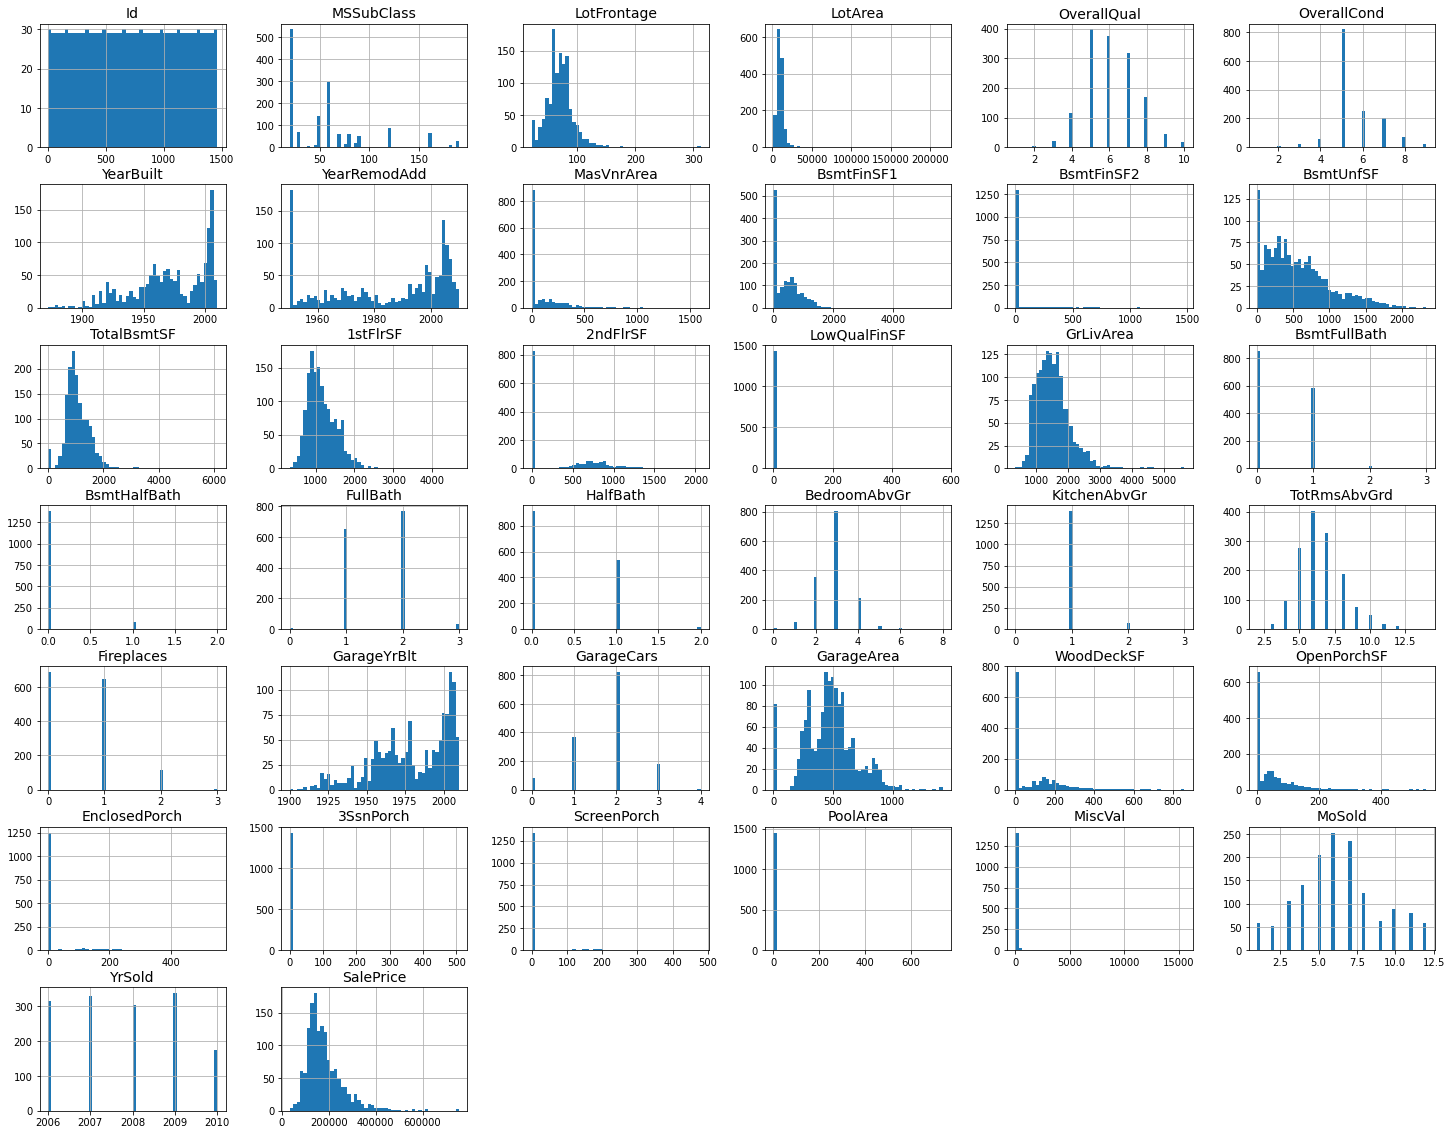

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing_labelled.hist(bins=50, figsize=(25, 20))
plt.show()

Plot scatter matrices of important quantitative features to look for any obvious correlations.

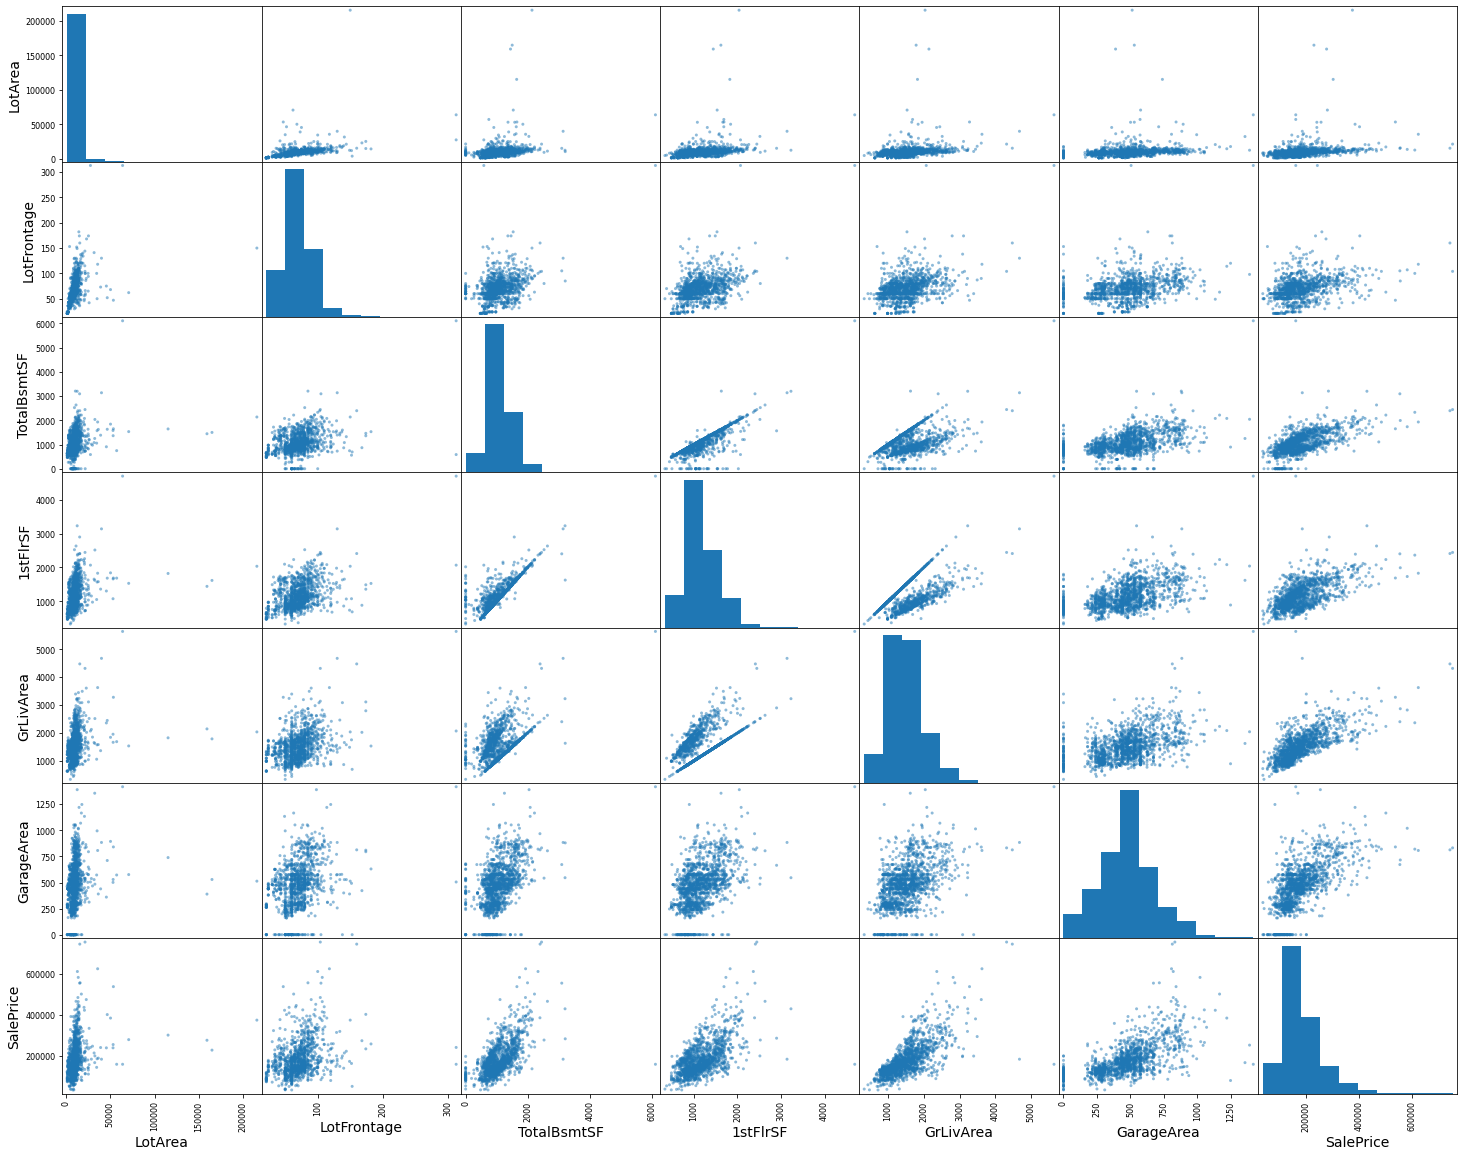

In [ ]:
attributes = ["LotArea", "LotFrontage", "TotalBsmtSF", "1stFlrSF", "GrLivArea",
              "GarageArea", "SalePrice"]
scatter_matrix(housing_labelled[attributes], figsize=(25, 20))
plt.show()

Plot a correlation heatmap between quantitative features and the target label SalePrice.

In [ ]:
corr = housing_labelled.corr()
corr["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<AxesSubplot:>

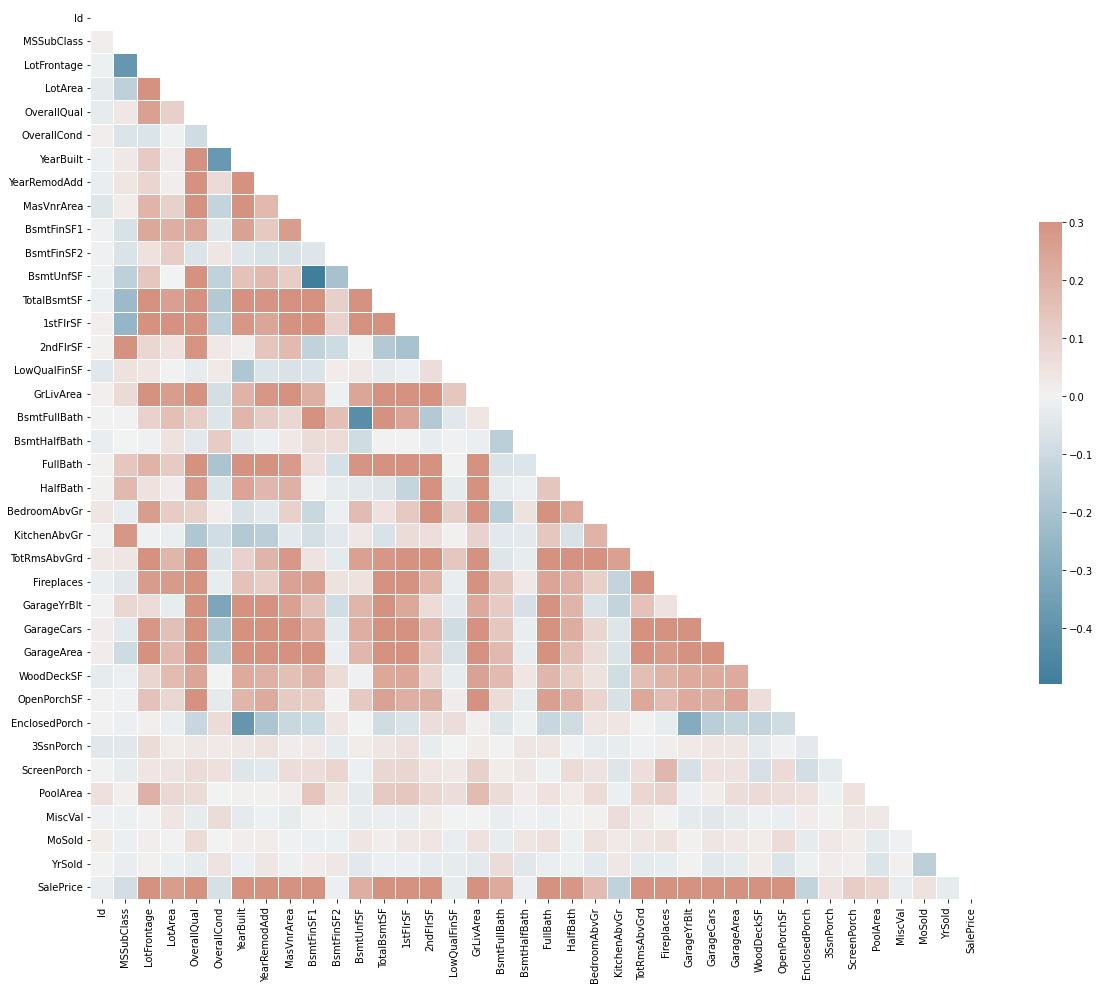

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 17))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# More Feature Engineering

Drop features that have too many 0s and/or too low correlation to the target label. 

Also drop 1stFlrSF and TotalBsmtSF because we've engineered a new feature 1stFlrPlusBsmtSF which is their sum and which has a higher correlation to the SalePrice target feature. This was done because TotalBsmtSF has some 0 values which make it impossible to log transform the feature in order to shrink its right-tail before inserting it into ML algorithms.

In [ ]:
drop_features_num = ["BsmtFinSF2", "LowQualFinSF", "BsmtHalfBath",
                     "EnclosedPorch","3SsnPorch", "ScreenPorch", "PoolArea",
                     "MiscVal", "YearsUntilRemod", "YearsUntilGarageBlt", 
                     "TotalBsmtSF", "1stFlrSF"
                    ]
drop_features_cat = ["Fence", "Alley", "PoolQC"]
housing_num.drop(drop_features_num, axis=1, inplace=True)
housing_cat.drop(drop_features_cat, axis=1, inplace=True)

In [ ]:
housing_test_num.drop(drop_features_num, axis=1, inplace=True)
housing_test_cat.drop(drop_features_cat, axis=1, inplace=True)

Move some numerical qualitative classifiers such as condition/quality ratings from the numerical features dataframe to the categorical features dataframe.

In [ ]:
num_encoders = ["OverallQual", "OverallCond", "OverallQC", "MSSubClass",
                "MoSold", "YrSold"]
housing_cat = housing_cat.join(housing_num[num_encoders])
housing_num.drop(num_encoders, axis=1, inplace=True)

In [ ]:
housing_test_cat = housing_test_cat.join(housing_test_num[num_encoders])
housing_test_num.drop(num_encoders, axis=1, inplace=True)

Create categories by binning numerical features that are either more appropriately handled as categories, such as YearBuilt, or have distributions that are inappropriate for inserting into an ML algorithm, such as WoodDeckSF, which has many 0s, but not so many that the feature should be dropped. 

In [ ]:
housing_num["BuiltCat"] = pd.cut(housing_num["YearBuilt"],
                               bins=[1870., 1930., 1950., 1960., 1970., 1980.,
                                    1990., 2000., 2005., np.inf],
                               labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])
housing_num["RemodCat"] = pd.cut(housing_num["YearRemodAdd"],
                               bins=[1940., 1960., 1970., 1980., 1990., 2000.,
                                    2005., np.inf],
                               labels=[1, 2, 3, 4, 5, 6, 7])
housing_num["WoodDeckCat"] = pd.cut(housing_num["WoodDeckSF"],
                               bins=[-1., 1., 180., np.inf],
                               labels=[1, 2, 3])
housing_num["OpenPorchCat"] = pd.cut(housing_num["OpenPorchSF"],
                               bins=[-1., 1., 100., np.inf],
                               labels=[1, 2, 3])
housing_num["2ndFlrCat"] = pd.cut(housing_num["2ndFlrSF"],
                               bins=[-1., 1., 750., np.inf],
                               labels=[1, 2, 3])
housing_num["MasVnrCat"] = pd.cut(housing_num["MasVnrArea"],
                               bins=[-1., 1., 250, np.inf],
                               labels=[1, 2, 3])
housing_num["BsmtFinSF1Cat"] = pd.cut(housing_num["BsmtFinSF1"],
                               bins=[-1., 1., 500., 1000., np.inf],
                               labels=[1, 2, 3, 4])
housing_num["BsmtUnfSFCat"] = pd.cut(housing_num["BsmtUnfSF"],
                              bins=[-1., 1., 500., 1000., 1500., np.inf],
                              labels=[1, 2, 3, 4, 5])

In [ ]:
housing_test_num["BuiltCat"] = pd.cut(housing_test_num["YearBuilt"],
                               bins=[1870., 1930., 1950., 1960., 1970., 1980.,
                                    1990., 2000., 2005., np.inf],
                               labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])
housing_test_num["RemodCat"] = pd.cut(housing_test_num["YearRemodAdd"],
                               bins=[1940., 1960., 1970., 1980., 1990., 2000.,
                                    2005., np.inf],
                               labels=[1, 2, 3, 4, 5, 6, 7])
housing_test_num["WoodDeckCat"] = pd.cut(housing_test_num["WoodDeckSF"],
                               bins=[-1., 1., 180., np.inf],
                               labels=[1, 2, 3])
housing_test_num["OpenPorchCat"] = pd.cut(housing_test_num["OpenPorchSF"],
                               bins=[-1., 1., 100., np.inf],
                               labels=[1, 2, 3])
housing_test_num["2ndFlrCat"] = pd.cut(housing_test_num["2ndFlrSF"],
                               bins=[-1., 1., 750., np.inf],
                               labels=[1, 2, 3])
housing_test_num["MasVnrCat"] = pd.cut(housing_test_num["MasVnrArea"],
                               bins=[-1., 1., 250, np.inf],
                               labels=[1, 2, 3])
housing_test_num["BsmtFinSF1Cat"] = pd.cut(housing_test_num["BsmtFinSF1"],
                               bins=[-1., 1., 500., 1000., np.inf],
                               labels=[1, 2, 3, 4])
housing_test_num["BsmtUnfSFCat"] = pd.cut(housing_test_num["BsmtUnfSF"],
                              bins=[-1., 1., 500., 1000., 1500., np.inf],
                              labels=[1, 2, 3, 4, 5])

Drop the original features which were used to create categories from the numerical dataframe, and move the newly created categorically binned features from the numerical features dataframe to the categorical features dataframe.

In [ ]:
binned_original_features = ["YearBuilt", "YearRemodAdd", "WoodDeckSF",
                            "OpenPorchSF", "2ndFlrSF", "MasVnrArea",
                            "BsmtFinSF1", "BsmtUnfSF"]
binned_categories = ["BuiltCat", "RemodCat", "WoodDeckCat", "OpenPorchCat",
                     "2ndFlrCat", "MasVnrCat", "BsmtFinSF1Cat", "BsmtUnfSFCat"]

housing_cat = housing_cat.join(housing_num[binned_categories])
housing_num.drop(binned_original_features, axis=1, inplace=True)
housing_num.drop(binned_categories, axis=1, inplace=True)

In [ ]:
housing_test_cat = housing_test_cat.join(housing_test_num[binned_categories])
housing_test_num.drop(binned_original_features, axis=1, inplace=True)
housing_test_num.drop(binned_categories, axis=1, inplace=True)

Visualize the newly created binned categorical features.

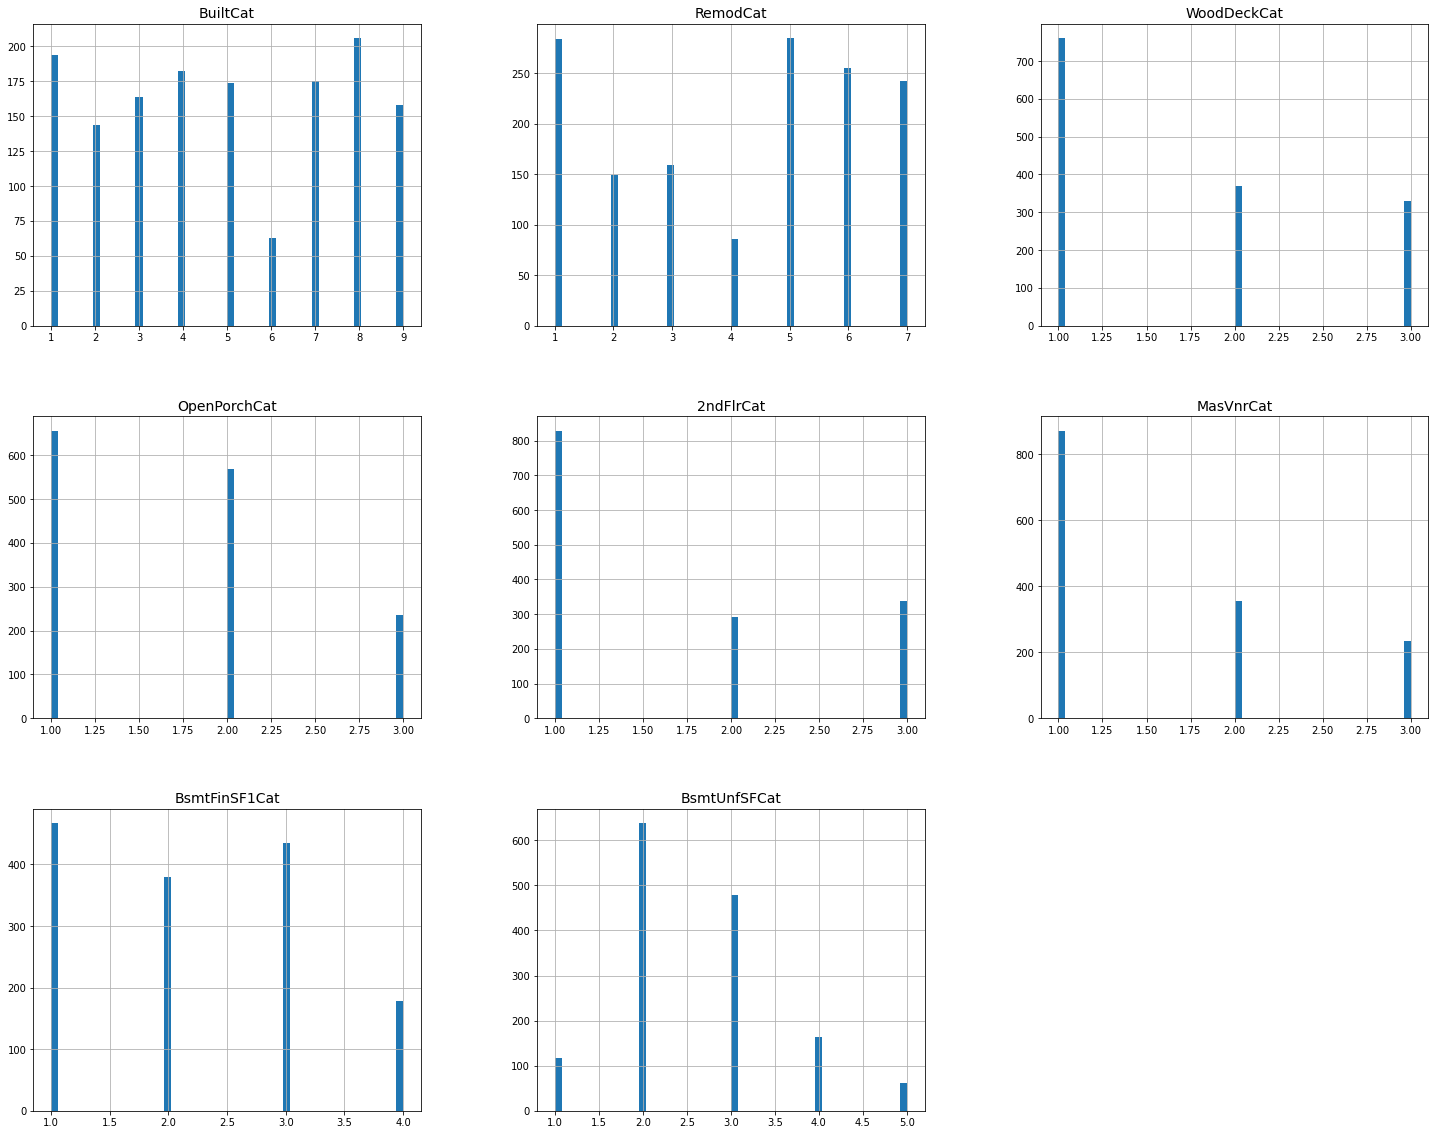

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing_cat[binned_categories].astype(float).hist(bins=50, figsize=(25, 20))
plt.show()

These numerical features have heavily right-tailed distributions which make them inappropriate for inserting into ML algorithms (even after scaling them). Therefore, we apply a log transformation to them in order to shrink their heavy right-tails while at the same time preserving their correlations to the target label.

In [ ]:
right_tail_features = ["1stFlrPlusBsmtSF", "GrLivArea", "LotArea",
                       "LotFrontage"]
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_features = log_transformer.transform(housing_num[right_tail_features])
housing_num.drop(right_tail_features, axis=1, inplace=True)

In [ ]:
log_test_features = log_transformer.transform(housing_test_num
                                             [right_tail_features])
housing_test_num.drop(right_tail_features, axis=1, inplace=True)

Visualize the newly log transformed features.

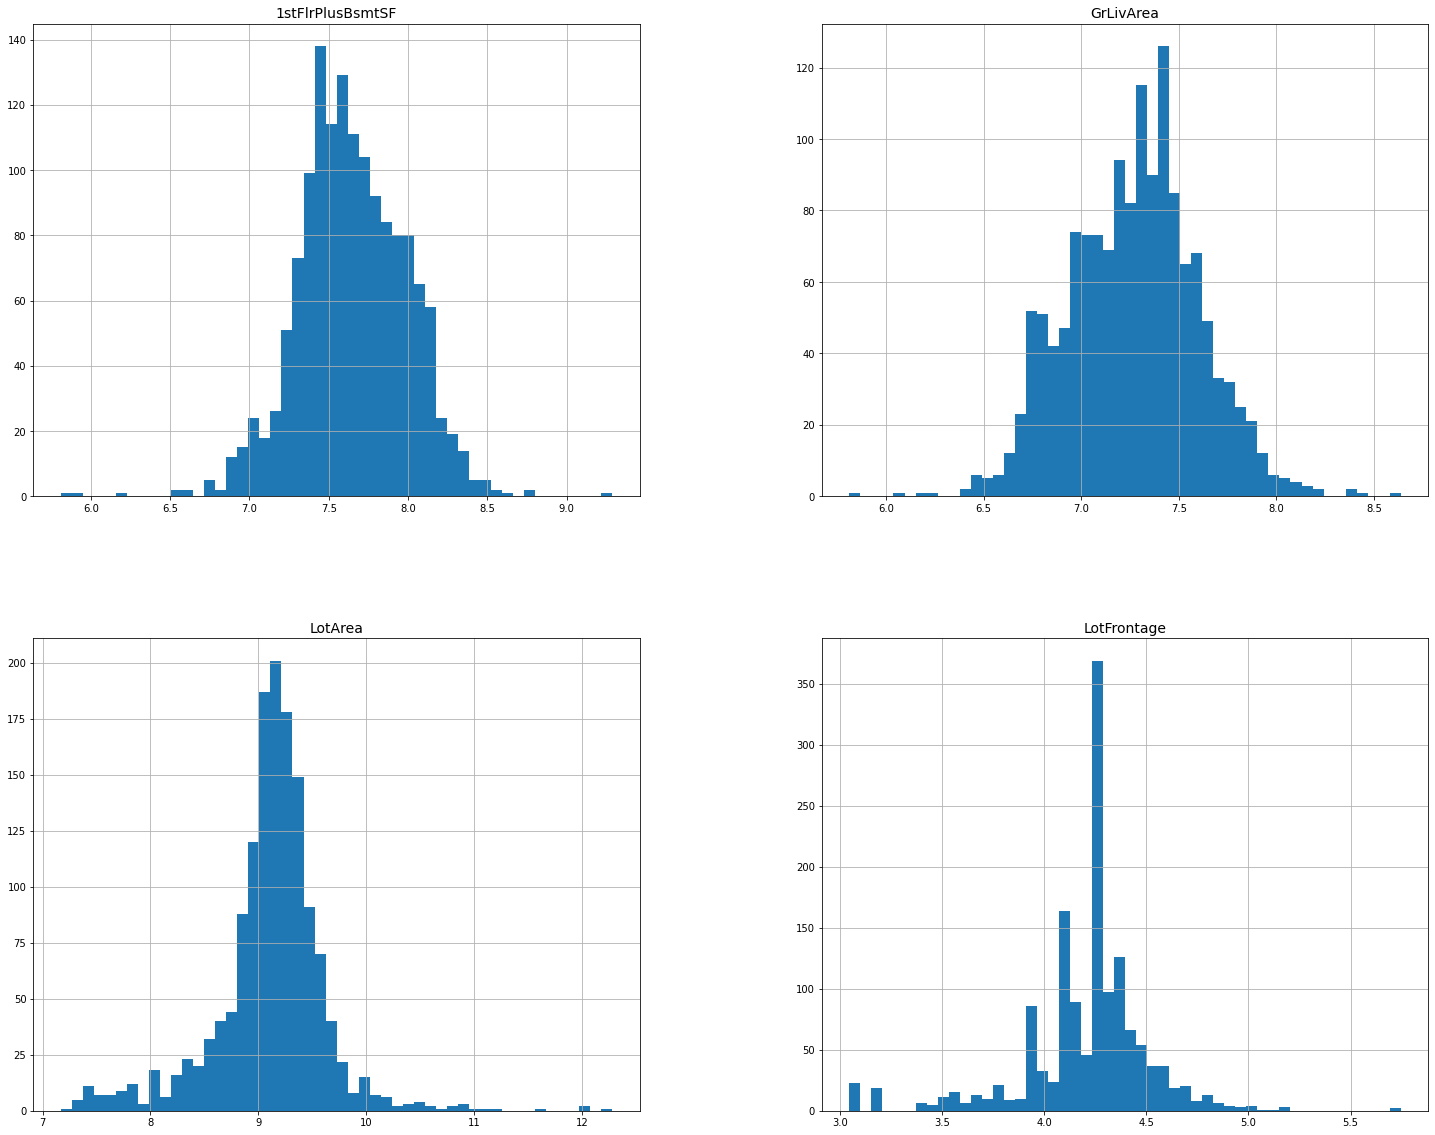

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

log_features.hist(bins=50, figsize=(25, 20))
plt.show()

Prepare to transform categorical features into one-hot encoded values by changing the features' data types to object.

In [ ]:
housing_cat["OverallQual"] = housing_cat["OverallQual"].astype(object)
housing_cat["OverallCond"] = housing_cat["OverallCond"].astype(object)
housing_cat["OverallQC"] = housing_cat["OverallQC"].astype(object)
housing_cat["MSSubClass"] = housing_cat["MSSubClass"].astype(object)
housing_cat["MoSold"] = housing_cat["MoSold"].astype(object)
housing_cat["YrSold"] = housing_cat["YrSold"].astype(object)

In [ ]:
housing_test_cat["OverallQual"] = housing_test_cat["OverallQual"].astype(object)
housing_test_cat["OverallCond"] = housing_test_cat["OverallCond"].astype(object)
housing_test_cat["OverallQC"] = housing_test_cat["OverallQC"].astype(object)
housing_test_cat["MSSubClass"] = housing_test_cat["MSSubClass"].astype(object)
housing_test_cat["MoSold"] = housing_test_cat["MoSold"].astype(object)
housing_test_cat["YrSold"] = housing_test_cat["YrSold"].astype(object)

Now put all the engineered features into a single final dataframe that will be inserted into the preprocessing pipeline.

In [ ]:
housing_final = housing_cat.copy()
housing_final = housing_final.join(housing_num)
housing_final = housing_final.join(log_features)

In [ ]:
housing_test_final = housing_test_cat.copy()
housing_test_final = housing_test_final.join(housing_test_num)
housing_test_final = housing_test_final.join(log_test_features)

# Preprocessing

classify different column subsets to specify transformations for each when using ColumnTransformer.

In [ ]:
one_hot_df_features =  ["MSZoning", "Street", "LotShape",
                        "LandContour", "LotConfig", "LandSlope",
                        "Condition1", "Condition2", "BldgType",
                        "HouseStyle", "RoofStyle", "RoofMatl",
                        "Exterior1st", "Exterior2nd", "MasVnrType",
                        "Foundation", "Heating", "CentralAir",
                        "Electrical", "GarageType", "PavedDrive",
                        "MiscFeature", "SaleType", "SaleCondition",
                        "Neighborhood", "MSSubClass", "Utilities",
                        "OverallQual", "OverallCond", "OverallQC",
                        "ExterQual", "ExterCond", "BsmtQual",
                        "BsmtCond", "BsmtExposure", "BsmtFinType1", 
                        "BsmtFinType2", "HeatingQC", "KitchenQual", 
                        "Functional", "FireplaceQu", "GarageFinish",
                        "GarageQual", "GarageCond", "MoSold",
                        "YrSold", "BuiltCat", "RemodCat", 
                        "WoodDeckCat", "OpenPorchCat", "2ndFlrCat",
                        "MasVnrCat", "BsmtFinSF1Cat", "BsmtUnfSFCat"
                       ]

scale_features = ["1stFlrPlusBsmtSF", "GrLivArea", "LotArea",
                  "LotFrontage", "BsmtFullBath",  "FullBath", 
                  "HalfBath", "BedroomAbvGr", "KitchenAbvGr", 
                  "Fireplaces", "GarageYrBlt", "GarageCars",
                  "GarageArea"
                 ]


Using the preprocessing ColumnTransformer, qualitative features are one-hot encoded and quantitative features are scaled using StandardScaler.

In [ ]:
one_hot_encoder = OneHotEncoder(handle_unknown="ignore")
standard_scaler = StandardScaler()

preprocessing = ColumnTransformer([
    ("scale_features", standard_scaler, scale_features),
    ("one_hot_encoder", one_hot_encoder, one_hot_df_features)]
    )

final_matrix = preprocessing.fit_transform(housing_final)

final_matrix.shape

(1460, 372)

In [ ]:
final_test_matrix = preprocessing.transform(housing_test_final)

Because Most features of the dataset are one-hot encoded, the output after preprocessing is a sparse matrix as most elements within the matrix are zero values.

# Apply Neural Networks 

Convert the preprocessed sparse matrix into a dense array using the toarray() method so as to be able to fit it to neural networks.

In [ ]:
final_matrix = final_matrix.toarray()
final_test_matrix = final_test_matrix.toarray()

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

Create an MLP with 3 hidden layers of 1000 neurons each to perform regression and predict the target labels. The result is inadeuqate with a final validation RMSE of about 40000.

In [ ]:
norm_layer = tf.keras.layers.Normalization(input_shape=final_matrix.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(final_matrix)
history = model.fit(final_matrix, housing_labels, epochs=50, 
                    validation_split=0.20)
predictions = model.predict(final_test_matrix)

Epoch 1/50
37/37 [==============================] - 3s 38ms/step - loss: 36073762816.0000 - root_mean_squared_error: 189930.9375 - val_loss: 24527861760.0000 - val_root_mean_squared_error: 156613.7344
Epoch 2/50
37/37 [==============================] - 1s 32ms/step - loss: 8614278144.0000 - root_mean_squared_error: 92813.1328 - val_loss: 4271798528.0000 - val_root_mean_squared_error: 65358.9961
Epoch 3/50
37/37 [==============================] - 1s 33ms/step - loss: 1501385216.0000 - root_mean_squared_error: 38747.7109 - val_loss: 2715166976.0000 - val_root_mean_squared_error: 52107.2656
Epoch 4/50
37/37 [==============================] - 1s 36ms/step - loss: 868375552.0000 - root_mean_squared_error: 29468.2129 - val_loss: 2366146048.0000 - val_root_mean_squared_error: 48643.0469
Epoch 5/50
37/37 [==============================] - 2s 54ms/step - loss: 640311616.0000 - root_mean_squared_error: 25304.3789 - val_loss: 2130462464.0000 - val_root_mean_squared_error: 46156.9336
Epoch 6/50
37

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 372)              745       
 n)                                                              
                                                                 
 dense (Dense)               (None, 1000)              373000    
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 2,376,746
Trainable params: 2,376,001
Non-trainable params: 745
____________________________________________

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

Create a class using Keras and use it to construct a wide & deep neural network by concatenating the norm layer and final hidden layer before sending them to the output.

In [ ]:
class RegressionModel(tf.keras.Model):
    def __init__(self, units=1000, activation="relu", **kwargs):
        super().__init__(**kwargs)  
        self.norm_layer = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_ = inputs
        norm = self.norm_layer(input_)
        hidden1 = self.hidden1(norm)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm, hidden2])
        output = self.main_output(concat)
        return output

model = RegressionModel(1000, activation="relu", name="nn_reg_model")

The result is once again inadequate with an RMSE in the 40000-50000 range.

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
model.norm_layer.adapt(final_matrix)
history = model.fit(final_matrix, housing_labels, epochs=50,
                    validation_split=0.20)
predictions = model.predict(final_test_matrix)

Epoch 1/50
37/37 [==============================] - 2s 27ms/step - loss: 38690197504.0000 - root_mean_squared_error: 196698.2344 - val_loss: 39373414400.0000 - val_root_mean_squared_error: 198427.3594
Epoch 2/50
37/37 [==============================] - 1s 22ms/step - loss: 36395614208.0000 - root_mean_squared_error: 190776.3438 - val_loss: 34228041728.0000 - val_root_mean_squared_error: 185008.2188
Epoch 3/50
37/37 [==============================] - 1s 23ms/step - loss: 26350995456.0000 - root_mean_squared_error: 162329.8906 - val_loss: 20481533952.0000 - val_root_mean_squared_error: 143113.7031
Epoch 4/50
37/37 [==============================] - 1s 22ms/step - loss: 12866837504.0000 - root_mean_squared_error: 113432.0859 - val_loss: 12302050304.0000 - val_root_mean_squared_error: 110914.6094
Epoch 5/50
37/37 [==============================] - 1s 26ms/step - loss: 8521720832.0000 - root_mean_squared_error: 92313.1641 - val_loss: 9917292544.0000 - val_root_mean_squared_error: 99585.6016

In [ ]:
model.summary()

Model: "nn_reg_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  multiple                 745       
 n)                                                              
                                                                 
 dense (Dense)               multiple                  373000    
                                                                 
 dense_1 (Dense)             multiple                  1001000   
                                                                 
 dense_2 (Dense)             multiple                  1373      
                                                                 
Total params: 1,376,118
Trainable params: 1,375,373
Non-trainable params: 745
_________________________________________________________________


# Apply ML & Boosting Algorithms

Construct a pipeline that preprocesses the dataset before sending it into its respective ML algorithms when calling the fit() method. 

Because the training set and test set were already separated beforehand, it was decided to use cross-validation with 10 folds when evaluating the model's RMSE on the training rather than splitting the already small training dataset into a validation set.

In [ ]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing_final, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale_features',
                                                  StandardScaler(),
                                                  ['1stFlrPlusBsmtSF',
                                                   'GrLivArea', 'LotArea',
                                                   'LotFrontage',
                                                   'BsmtFullBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning...
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'Foundation',
                                                   'Heating', 'CentralAir',
                                                   'Electrical', 'GarageType',
                                                   'PavedDrive', 'MiscFeature',
                                                   'SaleType', 'SaleCondition',
                                                   'Neighborhood', 'MSSubClass',
                                                   'Utilities', 'OverallQual',
                                                   'OverallCond', 'OverallQC', ...])])),
                ('linearregression', LinearRegression())])

The mean RMSE given by linear regression is about 31000. 

In [ ]:
lin_rmses = -cross_val_score(lin_reg, housing_final, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     31323.796873
std       8822.659943
min      23516.687573
25%      24751.649996
50%      27906.801002
75%      36001.495014
max      51455.019897
dtype: float64

Evaluate the RMSE on the training dataset for various other ML and boosting algorithms including SGDRegressor, ridge regression, elastic net regression, DecisionTreeRegressor, RandomForestRegressor, SVR, BaggingRegressor, GBRT, CatBoostRegressor, LGBMRegressor, XGBRegressor, ADABoostRegressor, and a StackingRegressor using three models.

The model with the best performance is shown to be the CatBoostRegressor as will be shown below.

In [ ]:
sgd = SGDRegressor(max_iter=10000, tol=1e-5, penalty=None, eta0=0.01,
                             n_iter_no_change=100, random_state=42)
sgd_reg = make_pipeline(preprocessing, sgd)
sgd_reg.fit(housing_final, housing_labels)  
housing_predictions = sgd_reg.predict(housing_final)

In [ ]:
sgd_rmses = -cross_val_score(sgd_reg, housing_final, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)

pd.Series(sgd_rmses).describe()

count       10.000000
mean     29956.989205
std       8480.369788
min      22540.881010
25%      24699.708644
50%      26889.185964
75%      32945.668617
max      50250.162867
dtype: float64

In [ ]:
ridge = Ridge(alpha=0.1, solver="auto")
ridge_reg = make_pipeline(preprocessing, ridge)
ridge_reg.fit(housing_final, housing_labels)
housing_predictions = ridge_reg.predict(housing_final)

In [ ]:
ridge_rmses = -cross_val_score(ridge_reg, housing_final, housing_labels,
                               scoring="neg_root_mean_squared_error", cv=10)

pd.Series(ridge_rmses).describe()

count       10.000000
mean     30786.160808
std       8784.457006
min      23414.401627
25%      23940.700440
50%      27561.710231
75%      35272.530462
max      51153.250662
dtype: float64

In [ ]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_reg = make_pipeline(preprocessing, elastic_net)
elastic_reg.fit(housing_final, housing_labels)
housing_predictions = elastic_reg.predict(housing_final)

In [ ]:
elastic_net_rmses = -cross_val_score(elastic_reg, housing_final, housing_labels,
                               scoring="neg_root_mean_squared_error", cv=10)

pd.Series(elastic_net_rmses).describe()

count       10.000000
mean     29712.479084
std       9223.714800
min      21712.296733
25%      23609.633143
50%      25831.861604
75%      34733.138789
max      50190.135081
dtype: float64

In [ ]:
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing_final, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale_features',
                                                  StandardScaler(),
                                                  ['1stFlrPlusBsmtSF',
                                                   'GrLivArea', 'LotArea',
                                                   'LotFrontage',
                                                   'BsmtFullBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning...
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'Foundation',
                                                   'Heating', 'CentralAir',
                                                   'Electrical', 'GarageType',
                                                   'PavedDrive', 'MiscFeature',
                                                   'SaleType', 'SaleCondition',
                                                   'Neighborhood', 'MSSubClass',
                                                   'Utilities', 'OverallQual',
                                                   'OverallCond', 'OverallQC', ...])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
tree_rmses = -cross_val_score(tree_reg, housing_final, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

pd.Series(tree_rmses).describe()

count       10.000000
mean     45943.689927
std      11419.988520
min      34326.974297
25%      38693.548160
50%      41260.242663
75%      50042.088184
max      68448.347562
dtype: float64

In [ ]:
svr = SVR(kernel="poly", degree=2, C=30000, epsilon=0.1)

svr_reg = make_pipeline(preprocessing, svr)
svr_reg.fit(housing_final, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale_features',
                                                  StandardScaler(),
                                                  ['1stFlrPlusBsmtSF',
                                                   'GrLivArea', 'LotArea',
                                                   'LotFrontage',
                                                   'BsmtFullBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning...
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'Foundation',
                                                   'Heating', 'CentralAir',
                                                   'Electrical', 'GarageType',
                                                   'PavedDrive', 'MiscFeature',
                                                   'SaleType', 'SaleCondition',
                                                   'Neighborhood', 'MSSubClass',
                                                   'Utilities', 'OverallQual',
                                                   'OverallCond', 'OverallQC', ...])])),
                ('svr', SVR(C=30000, degree=2, kernel='poly'))])

In [ ]:
svr_rmses = -cross_val_score(svr_reg, housing_final, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

pd.Series(svr_rmses).describe()

count       10.000000
mean     27390.635131
std      11664.504870
min      17935.062600
25%      19851.542447
50%      21776.424222
75%      32249.329887
max      53222.825714
dtype: float64

In [ ]:
bag = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_reg = make_pipeline(preprocessing, bag)
bag_reg.fit(housing_final, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale_features',
                                                  StandardScaler(),
                                                  ['1stFlrPlusBsmtSF',
                                                   'GrLivArea', 'LotArea',
                                                   'LotFrontage',
                                                   'BsmtFullBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning...
                                                   'MasVnrType', 'Foundation',
                                                   'Heating', 'CentralAir',
                                                   'Electrical', 'GarageType',
                                                   'PavedDrive', 'MiscFeature',
                                                   'SaleType', 'SaleCondition',
                                                   'Neighborhood', 'MSSubClass',
                                                   'Utilities', 'OverallQual',
                                                   'OverallCond', 'OverallQC', ...])])),
                ('baggingregressor',
                 BaggingRegressor(estimator=DecisionTreeRegressor(),
                                  max_samples=100, n_estimators=500, n_jobs=-1,
                                  random_state=42))])

In [ ]:
bag_rmses = -cross_val_score(bag_reg, housing_final, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(bag_rmses).describe()

count       10.000000
mean     34908.896907
std       8456.000794
min      26690.744471
25%      29434.482295
50%      31500.886864
75%      38003.713690
max      50996.706775
dtype: float64

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=10, n_estimators=300, 
                                 learning_rate=1.0, random_state=42)
gbrt_reg = make_pipeline(preprocessing, gbrt)
gbrt_reg.fit(housing_final, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale_features',
                                                  StandardScaler(),
                                                  ['1stFlrPlusBsmtSF',
                                                   'GrLivArea', 'LotArea',
                                                   'LotFrontage',
                                                   'BsmtFullBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning...
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'Foundation',
                                                   'Heating', 'CentralAir',
                                                   'Electrical', 'GarageType',
                                                   'PavedDrive', 'MiscFeature',
                                                   'SaleType', 'SaleCondition',
                                                   'Neighborhood', 'MSSubClass',
                                                   'Utilities', 'OverallQual',
                                                   'OverallCond', 'OverallQC', ...])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=1.0, max_depth=10,
                                           n_estimators=300,
                                           random_state=42))])

In [ ]:
gbrt_rmses = -cross_val_score(gbrt_reg, housing_final, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)
pd.Series(gbrt_rmses).describe()

count       10.000000
mean     45410.217879
std       8701.433985
min      35761.478880
25%      39743.871306
50%      40914.755979
75%      52936.692375
max      60468.011670
dtype: float64

In [ ]:
lgbm = LGBMRegressor(max_depth=5, n_estimators=30, 
                     learning_rate=0.2, random_state=42)
lgbm_reg = make_pipeline(preprocessing, lgbm)
lgbm_reg.fit(housing_final, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale_features',
                                                  StandardScaler(),
                                                  ['1stFlrPlusBsmtSF',
                                                   'GrLivArea', 'LotArea',
                                                   'LotFrontage',
                                                   'BsmtFullBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning...
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'Foundation',
                                                   'Heating', 'CentralAir',
                                                   'Electrical', 'GarageType',
                                                   'PavedDrive', 'MiscFeature',
                                                   'SaleType', 'SaleCondition',
                                                   'Neighborhood', 'MSSubClass',
                                                   'Utilities', 'OverallQual',
                                                   'OverallCond', 'OverallQC', ...])])),
                ('lgbmregressor',
                 LGBMRegressor(learning_rate=0.2, max_depth=5, n_estimators=30,
                               random_state=42))])

In [ ]:
lgbm_rmses = -cross_val_score(lgbm_reg, housing_final, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lgbm_rmses).describe()

count       10.000000
mean     28764.259360
std       6748.754495
min      21419.213909
25%      24583.580321
50%      25732.256354
75%      33657.703056
max      40424.388643
dtype: float64

In [ ]:
xgb = XGBRegressor(random_state=42)
xgb_reg = Pipeline(steps=[
     ("preprocessing", preprocessing),
     ("xgb", xgb)
])
xgb_reg.fit(housing_final, housing_labels)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scale_features',
                                                  StandardScaler(),
                                                  ['1stFlrPlusBsmtSF',
                                                   'GrLivArea', 'LotArea',
                                                   'LotFrontage',
                                                   'BsmtFullBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'S...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

In [ ]:
xgb_rmses = -cross_val_score(xgb_reg, housing_final, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)
pd.Series(xgb_rmses).describe()

count       10.000000
mean     29647.321505
std       7280.810215
min      23562.623702
25%      25233.015909
50%      26725.666454
75%      32630.857668
max      46777.521020
dtype: float64

In [ ]:
forest = RandomForestRegressor(n_estimators=300, random_state=42)
forest_reg = make_pipeline(preprocessing, forest)
forest_reg.fit(housing_final, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale_features',
                                                  StandardScaler(),
                                                  ['1stFlrPlusBsmtSF',
                                                   'GrLivArea', 'LotArea',
                                                   'LotFrontage',
                                                   'BsmtFullBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning...
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'Foundation',
                                                   'Heating', 'CentralAir',
                                                   'Electrical', 'GarageType',
                                                   'PavedDrive', 'MiscFeature',
                                                   'SaleType', 'SaleCondition',
                                                   'Neighborhood', 'MSSubClass',
                                                   'Utilities', 'OverallQual',
                                                   'OverallCond', 'OverallQC', ...])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=300, random_state=42))])

In [ ]:
forest_rmses = -cross_val_score(forest_reg, housing_final, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

count       10.000000
mean     29750.078877
std       8280.470837
min      22605.529840
25%      25170.197100
50%      25825.327545
75%      34173.953655
max      45966.605252
dtype: float64

In [ ]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
                            n_estimators=500,
                            learning_rate=1.0, random_state=42)
ada_reg = make_pipeline(preprocessing, ada)
ada_reg.fit(housing_final, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale_features',
                                                  StandardScaler(),
                                                  ['1stFlrPlusBsmtSF',
                                                   'GrLivArea', 'LotArea',
                                                   'LotFrontage',
                                                   'BsmtFullBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning...
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'Foundation',
                                                   'Heating', 'CentralAir',
                                                   'Electrical', 'GarageType',
                                                   'PavedDrive', 'MiscFeature',
                                                   'SaleType', 'SaleCondition',
                                                   'Neighborhood', 'MSSubClass',
                                                   'Utilities', 'OverallQual',
                                                   'OverallCond', 'OverallQC', ...])])),
                ('adaboostregressor',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10),
                                   n_estimators=500, random_state=42))])

In [ ]:
ada_rmses = -cross_val_score(ada_reg, housing_final, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)
pd.Series(ada_rmses).describe()

count       10.000000
mean     29376.917407
std       8545.366047
min      21287.413661
25%      23602.599812
50%      25078.691406
75%      34095.536951
max      46551.390709
dtype: float64

In [ ]:
cat = CatBoostRegressor(random_state=42)
cat_reg = Pipeline(steps=[
     ("preprocessing", preprocessing),
     ("cat", cat)
])
cat_reg.fit(housing_final, housing_labels)

Learning rate set to 0.043466
0:	learn: 77175.9834791	total: 51.6ms	remaining: 51.6s
1:	learn: 75003.8500941	total: 63.6ms	remaining: 31.8s
2:	learn: 72971.0642919	total: 74.6ms	remaining: 24.8s
3:	learn: 70894.8136767	total: 87ms	remaining: 21.7s
4:	learn: 68911.6838058	total: 98.1ms	remaining: 19.5s
5:	learn: 67150.1246737	total: 109ms	remaining: 18s
6:	learn: 65418.6010433	total: 120ms	remaining: 17s
7:	learn: 63951.0851843	total: 133ms	remaining: 16.5s
8:	learn: 62466.6794213	total: 148ms	remaining: 16.3s
9:	learn: 60994.8287043	total: 162ms	remaining: 16.1s
10:	learn: 59509.5269306	total: 174ms	remaining: 15.7s
11:	learn: 58168.6428393	total: 186ms	remaining: 15.3s
12:	learn: 56846.5223611	total: 198ms	remaining: 15.1s
13:	learn: 55636.3361050	total: 208ms	remaining: 14.7s
14:	learn: 54411.5630171	total: 222ms	remaining: 14.6s
15:	learn: 53271.1947603	total: 234ms	remaining: 14.4s
16:	learn: 52179.0716670	total: 246ms	remaining: 14.2s
17:	learn: 51242.5965000	total: 257ms	remainin

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scale_features',
                                                  StandardScaler(),
                                                  ['1stFlrPlusBsmtSF',
                                                   'GrLivArea', 'LotArea',
                                                   'LotFrontage',
                                                   'BsmtFullBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'S...
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'Foundation',
                                                   'Heating', 'CentralAir',
                                                   'Electrical', 'GarageType',
                                                   'PavedDrive', 'MiscFeature',
                                                   'SaleType', 'SaleCondition',
                                                   'Neighborhood', 'MSSubClass',
                                                   'Utilities', 'OverallQual',
                                                   'OverallCond', 'OverallQC', ...])])),
                ('cat',
                 <catboost.core.CatBoostRegressor object at 0x7f61e47a5d00>)])

In [ ]:
cat_rmses = -cross_val_score(cat_reg, housing_final, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)
pd.Series(cat_rmses).describe()

Streaming output truncated to the last 5000 lines.
4:	learn: 69571.9940971	total: 25.1ms	remaining: 4.99s
5:	learn: 67872.8879846	total: 29.5ms	remaining: 4.89s
6:	learn: 66158.4632458	total: 33.6ms	remaining: 4.76s
7:	learn: 64524.1153289	total: 37.8ms	remaining: 4.68s
8:	learn: 63047.6779285	total: 42.1ms	remaining: 4.64s
9:	learn: 61557.4660195	total: 46.3ms	remaining: 4.58s
10:	learn: 60084.1247012	total: 50.5ms	remaining: 4.54s
11:	learn: 58769.9169039	total: 54.6ms	remaining: 4.5s
12:	learn: 57481.6391173	total: 59ms	remaining: 4.48s
13:	learn: 56232.9148748	total: 63.2ms	remaining: 4.45s
14:	learn: 54982.9111137	total: 67.3ms	remaining: 4.42s
15:	learn: 53792.3463426	total: 71.5ms	remaining: 4.39s
16:	learn: 52716.0368150	total: 76.9ms	remaining: 4.45s
17:	learn: 51758.0010025	total: 81.4ms	remaining: 4.44s
18:	learn: 50686.5731181	total: 85.3ms	remaining: 4.41s
19:	learn: 49802.8719637	total: 89.5ms	remaining: 4.39s
20:	learn: 48842.6864849	total: 93.8ms	remaining: 4.37s
21:	le

count       10.000000
mean     25299.579097
std       6938.379518
min      18963.709678
25%      20091.336454
50%      22556.824213
75%      29427.110404
max      36689.986394
dtype: float64

With a mean RMSE of about 25000, CatBoostRegressor has the best performance out of all the models. Therefore, random-search is used to perform hyperparameter tuning in order to further improve the model (it was decided not to use grid-search because of time/computational considerations).

In [ ]:
distribs = {'cat__learning_rate': [0.03, 0.1],
            'cat__depth': [4, 6, 10],
            'cat__l2_leaf_reg': [1, 3, 5, 7, 9]
           }

cat_rnd_search = RandomizedSearchCV(
    cat_reg, param_distributions=distribs, n_iter=10, cv=5,
    scoring='neg_root_mean_squared_error', random_state=42)


cat_rnd_search.fit(housing_final, housing_labels)

Streaming output truncated to the last 5000 lines.
0:	learn: 77545.4902401	total: 1.99ms	remaining: 1.99s
1:	learn: 76144.5406230	total: 3.8ms	remaining: 1.9s
2:	learn: 74770.7331046	total: 5.61ms	remaining: 1.86s
3:	learn: 73571.2983774	total: 7.57ms	remaining: 1.88s
4:	learn: 72201.4934302	total: 9.56ms	remaining: 1.9s
5:	learn: 70883.5632907	total: 11.5ms	remaining: 1.91s
6:	learn: 69672.9055917	total: 13.5ms	remaining: 1.92s
7:	learn: 68483.7542125	total: 15.5ms	remaining: 1.92s
8:	learn: 67365.6421838	total: 17.4ms	remaining: 1.92s
9:	learn: 66284.4174799	total: 19.4ms	remaining: 1.92s
10:	learn: 65215.8335036	total: 21.4ms	remaining: 1.92s
11:	learn: 64189.4772188	total: 23.3ms	remaining: 1.92s
12:	learn: 63080.6954511	total: 25.2ms	remaining: 1.92s
13:	learn: 62007.6288123	total: 27.2ms	remaining: 1.92s
14:	learn: 61009.1765569	total: 30.5ms	remaining: 2s
15:	learn: 59947.6603805	total: 33.3ms	remaining: 2.05s
16:	learn: 59063.0500106	total: 35.3ms	remaining: 2.04s
17:	learn: 58

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('scale_features',
                                                                               StandardScaler(),
                                                                               ['1stFlrPlusBsmtSF',
                                                                                'GrLivArea',
                                                                                'LotArea',
                                                                                'LotFrontage',
                                                                                'BsmtFullBath',
                                                                                'FullBath',
                                                                                'HalfBath',
                                                                                'BedroomAbvGr',
                                                                                'KitchenAbvGr',
                                                                                'Fireplaces',
                                                                                'GarageYrBlt',
                                                                                'GarageCars',
                                                                                'GarageArea']),
                                                                              ('one_hot_encoder',
                                                                               OneHotEncoder(handl...
                                                                                'MiscFeature',
                                                                                'SaleType',
                                                                                'SaleCondition',
                                                                                'Neighborhood',
                                                                                'MSSubClass',
                                                                                'Utilities',
                                                                                'OverallQual',
                                                                                'OverallCond',
                                                                                'OverallQC', ...])])),
                                             ('cat',
                                              <catboost.core.CatBoostRegressor object at 0x7f61e47a5d00>)]),
                   param_distributions={'cat__depth': [4, 6, 10],
                                        'cat__l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'cat__learning_rate': [0.03, 0.1]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
cat_rnd_search.best_params_

{'cat__learning_rate': 0.03, 'cat__l2_leaf_reg': 1, 'cat__depth': 4}

In [ ]:
cat_rnd_search_rmses = -cross_val_score(cat_rnd_search.best_estimator_,
                                        housing_final, housing_labels,
                                        scoring="neg_root_mean_squared_error",
                                        cv=10)
pd.Series(cat_rnd_search_rmses).describe()

Streaming output truncated to the last 5000 lines.
0:	learn: 78133.0560166	total: 1.98ms	remaining: 1.97s
1:	learn: 76699.0882489	total: 4.38ms	remaining: 2.19s
2:	learn: 75333.5177306	total: 6.41ms	remaining: 2.13s
3:	learn: 73995.7140537	total: 8.43ms	remaining: 2.1s
4:	learn: 72832.7234834	total: 10.4ms	remaining: 2.08s
5:	learn: 71454.0729802	total: 12.6ms	remaining: 2.1s
6:	learn: 70344.4734225	total: 14.7ms	remaining: 2.08s
7:	learn: 69208.1073653	total: 16.7ms	remaining: 2.07s
8:	learn: 68073.0741672	total: 18.9ms	remaining: 2.08s
9:	learn: 66889.2264801	total: 20.8ms	remaining: 2.06s
10:	learn: 65799.1465207	total: 22.9ms	remaining: 2.06s
11:	learn: 64632.8238095	total: 24.8ms	remaining: 2.04s
12:	learn: 63657.5137716	total: 26.8ms	remaining: 2.04s
13:	learn: 62589.7792692	total: 28.8ms	remaining: 2.03s
14:	learn: 61527.5319248	total: 30.8ms	remaining: 2.02s
15:	learn: 60673.7788274	total: 33ms	remaining: 2.03s
16:	learn: 59682.8893880	total: 35.1ms	remaining: 2.03s
17:	learn: 

count       10.000000
mean     24927.408260
std       7298.583039
min      18528.927808
25%      20588.633988
50%      21769.786356
75%      27522.029279
max      38454.687997
dtype: float64

Random-search hyperparameter tuning has successfully improved the model's performance by decreasing the mean RMSE to below 25000.

Examining the feature importances, we can see that the three most important features for the catboost model are GrLivArea, 1stFlrPlusBsmtSF (engineered feature), and GarageCars. It is reassuring to see our newly engineered feature for the dataset being the second most important feature, because it confirms that we were on the right track when engineering new features.  

In [ ]:
final_model = cat_rnd_search.best_estimator_
feature_importances = final_model["cat"].feature_importances_

sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(18.7862967331961, 'scale_features__GrLivArea'),
 (12.383315217216813, 'scale_features__1stFlrPlusBsmtSF'),
 (10.351200101903428, 'scale_features__GarageCars'),
 (5.524360120647558, 'one_hot_encoder__ExterQual_TA'),
 (4.142005236096602, 'one_hot_encoder__BsmtQual_Ex'),
 (2.847630764576081, 'scale_features__LotArea'),
 (2.654896538965756, 'scale_features__GarageYrBlt'),
 (2.30056651530393, 'scale_features__GarageArea'),
 (2.282468261045084, 'scale_features__FullBath'),
 (2.1283267870580227, 'scale_features__Fireplaces'),
 (2.0586475096452914, 'one_hot_encoder__BsmtFinSF1Cat_4'),
 (1.8631359567142902, 'one_hot_encoder__KitchenQual_Ex'),
 (1.6614074960917333, 'one_hot_encoder__MSSubClass_60.0'),
 (1.6560971968779183, 'one_hot_encoder__KitchenQual_TA'),
 (1.581291028189354, 'one_hot_encoder__FireplaceQu_None'),
 (1.2330126299049113, 'one_hot_encoder__BsmtFinType1_GLQ'),
 (1.1427446316593, 'one_hot_encoder__Foundation_PConc'),
 (1.0285956897737387, 'one_hot_encoder__BsmtExposure_Gd'),
 (0.

Save the model using joblib in order to not have to train the model again

In [ ]:
joblib.dump(final_model, "catboost_model.pkl")

['catboost_model.pkl']

Try using StackingRegressor with our three most promising models. Unfortunately, the RMSE is worse than simply using CatBoostRegressor individually. Therefore, we will stick to CatBoostRegressor.

In [ ]:
stacking_reg = StackingRegressor(
    estimators=[
        ('cat', final_model),
        ('xgb', xgb_reg),
        ('svr', svr_reg)
    ],
    final_estimator=RandomForestRegressor(random_state=42),
    cv=5  
)
stacking_reg.fit(housing_final, housing_labels)

Streaming output truncated to the last 5000 lines.
0:	learn: 79091.8014646	total: 1.93ms	remaining: 1.93s
1:	learn: 77610.0050783	total: 4.27ms	remaining: 2.13s
2:	learn: 76194.5214033	total: 6.37ms	remaining: 2.12s
3:	learn: 74826.0723220	total: 8.29ms	remaining: 2.06s
4:	learn: 73484.4386356	total: 10.2ms	remaining: 2.04s
5:	learn: 72238.1358651	total: 12.3ms	remaining: 2.03s
6:	learn: 71099.1264212	total: 14.2ms	remaining: 2.01s
7:	learn: 69817.8937570	total: 16.1ms	remaining: 1.99s
8:	learn: 68591.7648651	total: 18ms	remaining: 1.98s
9:	learn: 67548.2851860	total: 20ms	remaining: 1.98s
10:	learn: 66519.8634486	total: 21.9ms	remaining: 1.97s
11:	learn: 65512.1987843	total: 23.8ms	remaining: 1.96s
12:	learn: 64490.7270373	total: 25.6ms	remaining: 1.95s
13:	learn: 63498.8397395	total: 28.9ms	remaining: 2.03s
14:	learn: 62514.1950257	total: 30.8ms	remaining: 2.02s
15:	learn: 61521.6693426	total: 32.7ms	remaining: 2.01s
16:	learn: 60627.1349341	total: 34.7ms	remaining: 2s
17:	learn: 596

StackingRegressor(cv=5,
                  estimators=[('cat',
                               Pipeline(steps=[('preprocessing',
                                                ColumnTransformer(transformers=[('scale_features',
                                                                                 StandardScaler(),
                                                                                 ['1stFlrPlusBsmtSF',
                                                                                  'GrLivArea',
                                                                                  'LotArea',
                                                                                  'LotFrontage',
                                                                                  'BsmtFullBath',
                                                                                  'FullBath',
                                                                                  'HalfBath',
                                                                                  'BedroomAbvGr',
                                                                                  'KitchenAbvGr',
                                                                                  'Fireplaces',
                                                                                  'GarageYrBlt',
                                                                                  'GarageCars',
                                                                                  'GarageArea']),
                                                                                ('one_hot_encoder',
                                                                                 OneHotEncod...
                                                                                  'RoofMatl',
                                                                                  'Exterior1st',
                                                                                  'Exterior2nd',
                                                                                  'MasVnrType',
                                                                                  'Foundation',
                                                                                  'Heating',
                                                                                  'CentralAir',
                                                                                  'Electrical',
                                                                                  'GarageType',
                                                                                  'PavedDrive',
                                                                                  'MiscFeature',
                                                                                  'SaleType',
                                                                                  'SaleCondition',
                                                                                  'Neighborhood',
                                                                                  'MSSubClass',
                                                                                  'Utilities',
                                                                                  'OverallQual',
                                                                                  'OverallCond',
                                                                                  'OverallQC', ...])])),
                                               ('svr',
                                                SVR(C=30000, degree=2,
                                                    kernel='poly'))]))],
                  final_estimator=RandomForestRegressor(random_state=42))

In [ ]:
stacking_rmses = -cross_val_score(stacking_reg, housing_final, housing_labels,
                                  scoring="neg_root_mean_squared_error",
                                  cv=10)
pd.Series(stacking_rmses).describe()

Streaming output truncated to the last 5000 lines.
0:	learn: 79845.6534517	total: 2.02ms	remaining: 2.01s
1:	learn: 78385.8436786	total: 4.56ms	remaining: 2.28s
2:	learn: 77087.4819405	total: 6.68ms	remaining: 2.22s
3:	learn: 75753.1316646	total: 8.75ms	remaining: 2.18s
4:	learn: 74377.6731666	total: 10.8ms	remaining: 2.15s
5:	learn: 73037.8480889	total: 12.9ms	remaining: 2.13s
6:	learn: 71895.4728839	total: 15ms	remaining: 2.12s
7:	learn: 70813.1554901	total: 17.1ms	remaining: 2.12s
8:	learn: 69628.9578632	total: 19.2ms	remaining: 2.11s
9:	learn: 68421.8796459	total: 21.3ms	remaining: 2.11s
10:	learn: 67241.6213484	total: 23.4ms	remaining: 2.1s
11:	learn: 66108.2505186	total: 25.5ms	remaining: 2.1s
12:	learn: 64962.8683300	total: 27.5ms	remaining: 2.09s
13:	learn: 63869.4809029	total: 29.6ms	remaining: 2.08s
14:	learn: 62820.3728685	total: 31.9ms	remaining: 2.1s
15:	learn: 61880.2039373	total: 34ms	remaining: 2.09s
16:	learn: 61001.4941411	total: 36.1ms	remaining: 2.08s
17:	learn: 600

count       10.000000
mean     26888.317059
std       8869.015748
min      16976.908635
25%      20576.130817
50%      24750.283206
75%      32778.810872
max      44259.463825
dtype: float64

# Final Predictions

Load our final catboost model using joblib.

In [ ]:
final_model = joblib.load("catboost_model.pkl")

Use the testing dataset in order to predict our target labels. Unforutnately, we cannot measure the accuracy of our predictions on the testing dataset becaause the target label values for the test dataset haven't been given. Therefore, we can only predict them.

In [ ]:
test_set_predictions = final_model.predict(housing_test_final)
test_set_predictions = test_set_predictions.round()

The final submission dataframe with the same structure as sample_submission.csv on Kaggle, consisting of the test set instance IDs along with their respective predicted target labels.

In [ ]:
predictions_df = pd.DataFrame(test_set_predictions,
                              columns=["SalePrice"],
                              index=test_ids.index)

predictions_df

,SalePrice
Id,
1461,120419.0
1462,157178.0
1463,188710.0
1464,192090.0
1465,185030.0
...,...
2915,86107.0
2916,84989.0
2917,157954.0


Convert the dataframe to a csv file for download.

In [ ]:
predictions_df.to_csv('submissions.csv') 
files.download('submissions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>